# HW 2 - Starter Code

First, be sure the sqlite file (found here: https://github.com/jknecht/baseball-archive-sqlite/raw/master/lahman2014.sqlite) is in the same folder as your code. 

The database contains many tables / relations, but we will be mainly using 2 relations: Salaries and Teams. The schema (description of the fields in the tables) are given below. Not all columns/fields are relevant for this homework, and we will pointout relevant fields as we walk through the assignement. 

Salaries table
---------------
- yearID         Year
- teamID         Team
- lgID           League
- playerID       Player ID code
- salary         Salary


Teams Table
-----------
- yearID         Year
- lgID           League
- teamID         Team
- franchID       Franchise (links to TeamsFranchise table)
- divID          Team's division
- Rank           Position in final standings
- G              Games played
- GHome          Games played at home
- W              Wins
- L              Losses
- DivWin         Division Winner (Y or N)
- WCWin          Wild Card Winner (Y or N)
- LgWin          League Champion(Y or N)
- WSWin          World Series Winner (Y or N)
- R              Runs scored
- AB             At bats
- H              Hits by batters
- 2B             Doubles
- 3B             Triples
- HR             Homeruns by batters
- BB             Walks by batters
- SO             Strikeouts by batters
- SB             Stolen bases
- CS             Caught stealing
- HBP            Batters hit by pitch
- SF             Sacrifice flies
- RA             Opponents runs scored
- ER             Earned runs allowed
- ERA            Earned run average
- CG             Complete games
- SHO            Shutouts
- SV             Saves
- IPOuts         Outs Pitched (innings pitched x 3)
- HA             Hits allowed
- HRA            Homeruns allowed
- BBA            Walks allowed
- SOA            Strikeouts by pitchers
- E              Errors
- DP             Double Plays
- FP             Fielding  percentage
- name           Team's full name
- park           Name of team's home ballpark
- attendance     Home attendance total
- BPF            Three-year park factor for batters
- PPF            Three-year park factor for pitchers
- teamIDBR       Team ID used by Baseball Reference website
- teamIDlahman45 Team ID used in Lahman database version 4.5
- teamIDretro    Team ID used by Retrosheet

In [4]:
import sqlite3
import pandas

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)  # connect to database and ingest the tables 

# lets run a query to look at the data
salary_query = "SELECT yearID, sum(salary) as total_payroll FROM Salaries WHERE lgID == 'AL' GROUP BY yearID"

team_salaries = pandas.read_sql(salary_query, conn)
team_salaries.head()

,yearID,total_payroll
0,1985,134401120.0
1,1986,157716444.0
2,1987,136088747.0
3,1988,157049812.0
4,1989,188771688.0


## Analysis

We want to understand how efficient teams have been historically at spending money and getting wins in return. In the case of Moneyball, one would expect that Oakland was not much more efficient than other teams in their spending before 2000, were much more efficient (they made a movie about it after all) between 2000 and 2005, and by then other teams may have caught up. Lets see how this is reflected in the data we have.

### Relation Creation

Using SQL compute a new relation that contains a subset of fields of interest to help us compute further statisitcs of interest.  We neeed to think about the type of join used as it determines how missing data is handled. In the code below, a SQL statment is executed to create the new relation jusing a join between the two tables; 




In [5]:
createTable_query = "CREATE TABLE statsTbl AS SELECT \
Salaries.yearID, Teams.teamID, Teams.name, Salaries.salary, Teams.G, Teams.W, Teams.L \
FROM Salaries  \
JOIN Teams \
ON Salaries.yearID=Teams.yearID AND Salaries.teamID=Teams.teamID \
WHERE Salaries.lgID=='AL' ;"





# if you run this mulitple times, you may see an error stating "statsTbl already exists". This error message can be ignored. 

OperationalError: table statsTbl already exists

In [6]:
query = "select * from statsTbl;"

result = pandas.read_sql(query, conn)
result.head()


# As you can see, it generates a new table/relation which contains 7 fields:
# yearID
# teamID
# name
# salary
# G --> denotes the number of games
# W --> denotes the number of wins
# L --> denotes the number of losses

,yearID,teamID,name,salary,G,W,L
0,1985,BAL,Baltimore Orioles,625000.0,161,83,78
1,1985,BAL,Baltimore Orioles,480000.0,161,83,78
2,1985,BAL,Baltimore Orioles,437500.0,161,83,78
3,1985,BAL,Baltimore Orioles,512500.0,161,83,78
4,1985,BAL,Baltimore Orioles,375000.0,161,83,78


Suppose we want to print the rows / entries for Oakland between 1988 - 1989. Hint: need to use a WHERE clause in the SQL query to filter out rows only for teamID="OAK"

In [9]:
query = "SELECT * FROM statsTbl WHERE teamID='OAK' AND yearID>=1988 AND yearID<=1989;"

result = pandas.read_sql(query, conn)
result.head()

,yearID,teamID,name,salary,G,W,L
0,1988,OAK,Oakland Athletics,495000.0,162,104,58
1,1988,OAK,Oakland Athletics,325000.0,162,104,58
2,1988,OAK,Oakland Athletics,550000.0,162,104,58
3,1988,OAK,Oakland Athletics,650000.0,162,104,58
4,1988,OAK,Oakland Athletics,100000.0,162,104,58


Suppose we want to print the year for which Oakland had the largest number of wins. Lets write that SQL query. 

In [10]:
query = "SELECT yearID, max(W) from statsTbl WHERE teamID='OAK';"

result = pandas.read_sql(query, conn)
result.head()

,yearID,max(W)
0,1988,104


Suppose we want to compute the total payroll for teamID='OAK' for the yearID='1988'. To do this, we must sum-up all the salaries for a given team for a given year. 

In [11]:
query = "SELECT teamID, yearID, SUM(salary) AS TotalSalary  \
FROM statsTbl  \
WHERE yearID='1988' AND teamID='OAK' \
GROUP BY teamID,yearID;"

result = pandas.read_sql(query, conn)
result.head()


,teamID,yearID,TotalSalary
0,OAK,1988,9690000.0


## Problem 1 

Using SQL, compute the result containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination). 

Hint: Be sure to perform a groupby on the fields teamID and yearID



In [12]:
query = "SELECT *, sum(salary) as Salary_Total, CAST(W as float)/CAST(G as float)*100 as Win_Prct \
FROM statsTbl \
GROUP BY teamID, yearID;"

result = pandas.read_sql(query, conn)
result.head()

,yearID,teamID,name,salary,G,W,L,Salary_Total,Win_Prct
0,1997,ANA,Anaheim Angels,1300000.0,162,84,78,31135472.0,51.851852
1,1998,ANA,Anaheim Angels,225000.0,162,85,77,41281000.0,52.469136
2,1999,ANA,Anaheim Angels,210000.0,162,70,92,55388166.0,43.209877
3,2000,ANA,Anaheim Angels,222500.0,162,82,80,51464167.0,50.617284
4,2001,ANA,Anaheim Angels,200500.0,162,75,87,47535167.0,46.296296


## Problem 2

Write code to printout the teamID that had the highest WinningPercentage over total sepending (salaries). 

In [31]:
createTable_query = "CREATE TABLE win_spend2 AS SELECT *, sum(salary) as Salary_Total, \
CAST(W as float)/CAST(G as float)*100 as Win_Prct \
FROM statsTbl \
group by yearID, teamID;"

cursor = conn.cursor()
cursor.execute(createTable_query)
conn.commit()

# if you run this mulitple times, you may see an error stating "statsTbl already exists". This error message can be ignored. 

In [32]:
query = "SELECT * from win_spend2"
result_winspend = pandas.read_sql(query, conn)
result_winspend.head()

,yearID,teamID,name,salary,G,W,L,Salary_Total,Win_Prct
0,1985,BAL,Baltimore Orioles,121000.0,161,83,78,11560712.0,51.552795
1,1985,BOS,Boston Red Sox,325000.0,163,81,81,10897560.0,49.693252
2,1985,CAL,California Angels,550000.0,162,90,72,14427894.0,55.555556
3,1985,CHA,Chicago White Sox,195000.0,163,85,77,9846178.0,52.147239
4,1985,CLE,Cleveland Indians,125000.0,162,60,102,6551666.0,37.037037
5,1985,DET,Detroit Tigers,550000.0,161,84,77,10348143.0,52.173913
6,1985,KCA,Kansas City Royals,843750.0,162,91,71,9321179.0,56.172840
7,1985,MIN,Minnesota Twins,375000.0,162,77,85,5764821.0,47.530864
8,1985,ML4,Milwaukee Brewers,1000000.0,161,71,90,11284107.0,44.099379
9,1985,NYA,New York Yankees,550000.0,161,97,64,14238204.0,60.248447


In [33]:
query = "SELECT *, max(Win_Prct/Salary_Total) from win_spend2"

result_winspend = pandas.read_sql(query, conn)
result_winspend.head()

,yearID,teamID,name,salary,G,W,L,Salary_Total,Win_Prct,max(Win_Prct/Salary_Total)
0,1987,TEX,Texas Rangers,620000.0,162,75,87,880000.0,46.296296,0.000053


## Problem 3

Write code to produce plots that illustrate the team's total spending (salaries) conditioned on time (from 1990-2014), specifically for teamID='OAK'.

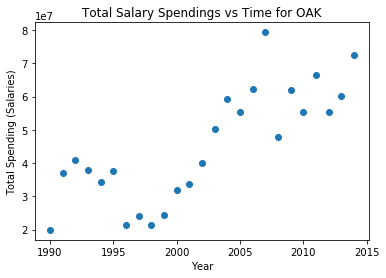

In [134]:
%matplotlib inline
#from urllib import urlopen

#import brewer2mpl
import matplotlib.pyplot as plt

query = "SELECT teamID, yearID, SUM(salary) AS TotalSalary  \
FROM statsTbl  \
WHERE teamID='OAK' AND yearID>1989 AND yearID<2015 \
GROUP BY teamID,yearID;"

result = pandas.read_sql(query, conn)
plt.title('Total Salary Spendings vs Time for OAK')
plt.ylabel('''Total Spending (Salaries)''')
plt.xlabel('Year')
plt.scatter(result["yearID"],result["TotalSalary"])



## Problem 4

Write code to discretize year into five time periods (you can use pandas.cut to accomplish this) and then make a scatterplot showing mean winning percentage (y-axis) vs. mean payroll (x-axis) for each of the five time periods.

What can you say about team payrolls across these periods? Are there any teams that standout as being particularly good at paying for wins across these time periods? What can you say about the Oakland A’s spending efficiency across these time periods (labeling points in the scatterplot can help interpretation).

In [135]:
bins = [1984,1990,1996,2002,2008,2014]

group_names = ['First Group','Second Group', 'Third Group', 'Fourth Group', 'Last Group']

query = "SELECT * FROM win_spend2"
result_winspend = pandas.read_sql(query, conn)

categories = pandas.cut(result_winspend['yearID'], bins, labels=group_names)
result_winspend['categories'] = pandas.cut(result_winspend['yearID'], bins, labels=group_names)
result_winspend['scoresBinned'] = pandas.cut(result_winspend['yearID'], bins)
result_winspend.head()

,yearID,teamID,name,salary,G,W,L,Salary_Total,Win_Prct,categories,scoresBinned
0,1985,BAL,Baltimore Orioles,121000.0,161,83,78,11560712.0,51.552795,First Group,"(1984, 1990]"
1,1985,BOS,Boston Red Sox,325000.0,163,81,81,10897560.0,49.693252,First Group,"(1984, 1990]"
2,1985,CAL,California Angels,550000.0,162,90,72,14427894.0,55.555556,First Group,"(1984, 1990]"
3,1985,CHA,Chicago White Sox,195000.0,163,85,77,9846178.0,52.147239,First Group,"(1984, 1990]"
4,1985,CLE,Cleveland Indians,125000.0,162,60,102,6551666.0,37.037037,First Group,"(1984, 1990]"


In [136]:
collapse = result_winspend.groupby(['categories','teamID']).mean()
collapse.head()



yearID         salary           G          W          L  \
categories  teamID                                                            
First Group ANA        NaN            NaN         NaN        NaN        NaN   
            BAL     1987.5  203166.666667  161.500000  73.333333  88.166667   
            BOS     1987.5  547916.666667  162.000000  85.666667  76.166667   
            CAL     1987.5  741666.500000  162.000000  83.833333  78.166667   
            CHA     1987.5  276051.666667  161.833333  78.000000  83.666667   

                    Salary_Total   Win_Prct  
categories  teamID                           
First Group ANA              NaN        NaN  
            BAL     1.165826e+07  45.403599  
            BOS     1.456336e+07  52.890240  
            CAL     1.507731e+07  51.748971  
            CHA     9.008958e+06  48.183960

In [137]:
collapse = collapse.dropna() #drop NaN
print('''The data shows that average total salaries spent by all teams have significantly 
across time periods. ''')
collapse.head(100)

The data shows that average total salaries spent by all teams have significantly 
across time periods. 


yearID        salary           G          W          L  \
categories   teamID                                                           
First Group  BAL     1987.5  2.031667e+05  161.500000  73.333333  88.166667   
             BOS     1987.5  5.479167e+05  162.000000  85.666667  76.166667   
             CAL     1987.5  7.416665e+05  162.000000  83.833333  78.166667   
             CHA     1987.5  2.760517e+05  161.833333  78.000000  83.666667   
             CLE     1987.5  9.875000e+04  162.166667  72.166667  89.833333   
             DET     1987.5  4.820833e+05  161.833333  82.500000  79.333333   
             KCA     1987.5  9.433613e+05  161.666667  83.500000  78.166667   
             MIN     1987.5  5.695000e+05  162.000000  79.666667  82.333333   
             ML4     1987.5  1.433333e+06  161.666667  80.166667  81.500000   
             NYA     1987.5  1.511834e+06  161.500000  83.666667  77.833333   
             OAK     1987.5  3.280625e+05  162.000000  90.000000  72.000000   
             SEA     1987.5  3.957500e+05  161.833333  72.833333  89.000000   
             TEX     1987.5  3.066667e+05  161.666667  76.666667  85.000000   
             TOR     1987.5  6.866667e+05  162.000000  90.500000  71.333333   
Fourth Group ANA     2003.5  6.187500e+05  162.000000  84.500000  77.500000   
             BAL     2005.5  3.103750e+06  162.000000  71.666667  90.166667   
             BOS     2005.5  1.262871e+06  162.000000  94.166667  67.833333   
             CHA     2005.5  4.420833e+06  162.166667  86.500000  75.666667   
             CLE     2005.5  5.408333e+06  162.000000  82.666667  79.333333   
             DET     2005.5  3.942833e+06  162.000000  73.833333  88.166667   
             KCA     2005.5  7.358333e+05  162.000000  67.166667  94.833333   
             LAA     2006.5  7.662500e+05  162.000000  94.500000  67.500000   
             MIN     2005.5  2.179167e+06  162.166667  88.000000  74.166667   
             NYA     2005.5  3.337139e+06  162.166667  96.166667  65.833333   
             OAK     2005.5  3.232500e+06  161.833333  86.500000  75.333333   
             SEA     2005.5  2.377000e+06  162.000000  75.333333  86.666667   
             TBA     2005.5  4.382000e+05  161.833333  70.666667  91.166667   
             TEX     2005.5  3.872218e+06  162.000000  78.833333  83.166667   
             TOR     2005.5  1.791667e+06  161.833333  81.500000  80.333333   
Last Group   BAL     2011.5  3.192042e+06  162.000000  78.833333  83.166667   
...                     ...           ...         ...        ...        ...   
             TOR     2011.5  4.173333e+06  162.000000  78.500000  83.500000   
Second Group BAL     1993.5  3.677500e+05  150.833333  77.166667  73.500000   
             BOS     1993.5  1.142100e+06  151.166667  77.000000  74.166667   
             CAL     1993.5  1.886667e+05  151.166667  69.833333  81.333333   
             CHA     1993.5  2.872500e+06  151.000000  81.166667  69.666667   
             CLE     1993.5  7.138888e+05  150.666667  79.000000  71.666667   
             DET     1993.5  1.821111e+06  151.166667  68.333333  82.833333   
             KCA     1993.5  5.590000e+05  151.000000  74.500000  76.500000   
             MIN     1993.5  1.021333e+06  150.833333  73.833333  77.000000   
             ML4     1993.5  2.356667e+06  151.166667  73.666667  77.500000   
             NYA     1993.5  1.323334e+06  151.000000  79.333333  71.500000   
             OAK     1993.5  9.455000e+05  151.000000  74.000000  77.000000   
             SEA     1993.5  3.470833e+05  150.666667  73.666667  77.000000   
             TEX     1993.5  7.612500e+05  151.166667  77.333333  73.666667   
             TOR     1993.5  3.988333e+05  151.166667  77.833333  73.333333   
Third Group  ANA     1999.5  4.013333e+05  162.000000  82.500000  79.500000   
             BAL     1999.5  8.672222e+05  162.000000  76.500000  85.333333   
             BOS     1999.5  8.229167e+05  161.833333  87.333333  74.50

It appears that generally speaking, as mean total salary increases, mean winning
percentage increases as well across the five periods. 


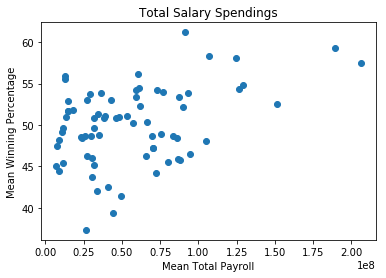

In [138]:
print('''It appears that generally speaking for all teams, as mean total salary increases, mean winning
percentage increases as well across the five periods. ''')

plt.title('Total Salary Spendings')
plt.ylabel('Mean Winning Percentage')
plt.xlabel('Mean Total Payroll')
plt.scatter(collapse["Salary_Total"],collapse["Win_Prct"])

In [139]:
query = "SELECT teamID, yearID,Win_Prct, SUM(salary) AS TotalSalary   \
FROM win_spend2  \
WHERE teamID='OAK' \
GROUP BY teamID,yearID;"

result_winspend = pandas.read_sql(query, conn)

categories = pandas.cut(result_winspend['yearID'], bins, labels=group_names)
result_winspend['categories'] = pandas.cut(result_winspend['yearID'], bins, labels=group_names)
result_winspend['scoresBinned'] = pandas.cut(result_winspend['yearID'], bins)
result_winspend.head(10)

,teamID,yearID,Win_Prct,TotalSalary,categories,scoresBinned
0,OAK,1985,47.530864,207500.0,First Group,"(1984, 1990]"
1,OAK,1986,46.913580,79000.0,First Group,"(1984, 1990]"
2,OAK,1987,50.000000,171875.0,First Group,"(1984, 1990]"
3,OAK,1988,64.197531,410000.0,First Group,"(1984, 1990]"
4,OAK,1989,61.111111,425000.0,First Group,"(1984, 1990]"
5,OAK,1990,63.580247,675000.0,First Group,"(1984, 1990]"
6,OAK,1991,51.851852,775000.0,Second Group,"(1990, 1996]"
7,OAK,1992,59.259259,1100000.0,Second Group,"(1990, 1996]"
8,OAK,1993,41.975309,325000.0,Second Group,"(1990, 1996]"
9,OAK,1994,44.736842,3250000.0,Second Group,"(1990, 1996]"


The Oakland A's have really great mean win percentage stats compared to other teams.
As the graph below shows, contrary to the traditional notion that 
spending more results in more wins, the groups of years where the Oakland A's
spent the least amount of money actually resulted in them having a higher win percentage.


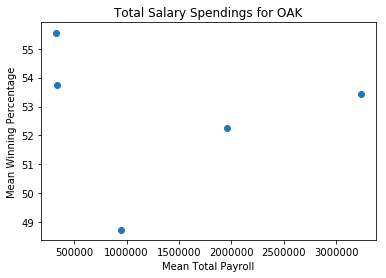

In [140]:
collapse = result_winspend.groupby(['categories','teamID']).mean()
collapse = collapse.dropna() #drop NaN

print('''The Oakland A's have really great mean win percentage stats compared to other teams.
As the graph below shows, contrary to the traditional notion that 
spending more results in more wins, the groups of years where the Oakland A's
spent the least amount of money actually resulted in them having a higher win percentage.''')

plt.title('Total Salary Spendings for OAK')
plt.ylabel('Mean Winning Percentage')
plt.xlabel('Mean Total Payroll')
plt.scatter(collapse["TotalSalary"],collapse["Win_Prct"])